<a href="https://colab.research.google.com/github/rishisai0811/MachineLearning_Lab_Codes/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math

# Create a pandas DataFrame from the provided data
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'is_student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Calculate the entropy of a target variable
def entropy(target):
    total = len(target)
    counts = target.value_counts()
    entropy = 0
    for count in counts:
        p = count / total
        entropy -= p * math.log2(p)
    return entropy

# Calculate Information Gain for an attribute
def information_gain(data, attribute, target):
    total_entropy = entropy(data[target])
    weighted_entropy = 0
    values = data[attribute].unique()
    for value in values:
        subset = data[data[attribute] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset[target])
    return total_entropy - weighted_entropy

# Calculate Information Gain for each attribute
target_attribute = 'buys_computer'
information_gains = {}
for attribute in df.columns:
    if attribute != target_attribute:
        ig = information_gain(df, attribute, target_attribute)
        information_gains[attribute] = ig

# Find the attribute with the highest Information Gain
best_attribute = max(information_gains, key=information_gains.get)

print("Information Gains:")
for attribute, ig in information_gains.items():
    print(f"{attribute}: {ig}")

print(f"The first feature for the decision tree is '{best_attribute}' with IG = {information_gains[best_attribute]}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
is_student: 0.15183550136234159
credit_rating: 0.04812703040826949
The first feature for the decision tree is 'age' with IG = 0.24674981977443933


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'is_student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)
categorical_cols = ['age', 'income', 'is_student', 'credit_rating']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
X = df_encoded.drop(columns=['buys_computer'])
y = df_encoded['buys_computer']
model = DecisionTreeClassifier()
model.fit(X, y)
training_accuracy = model.score(X, y)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Training Set Accuracy: 1.0
Tree Depth: 4


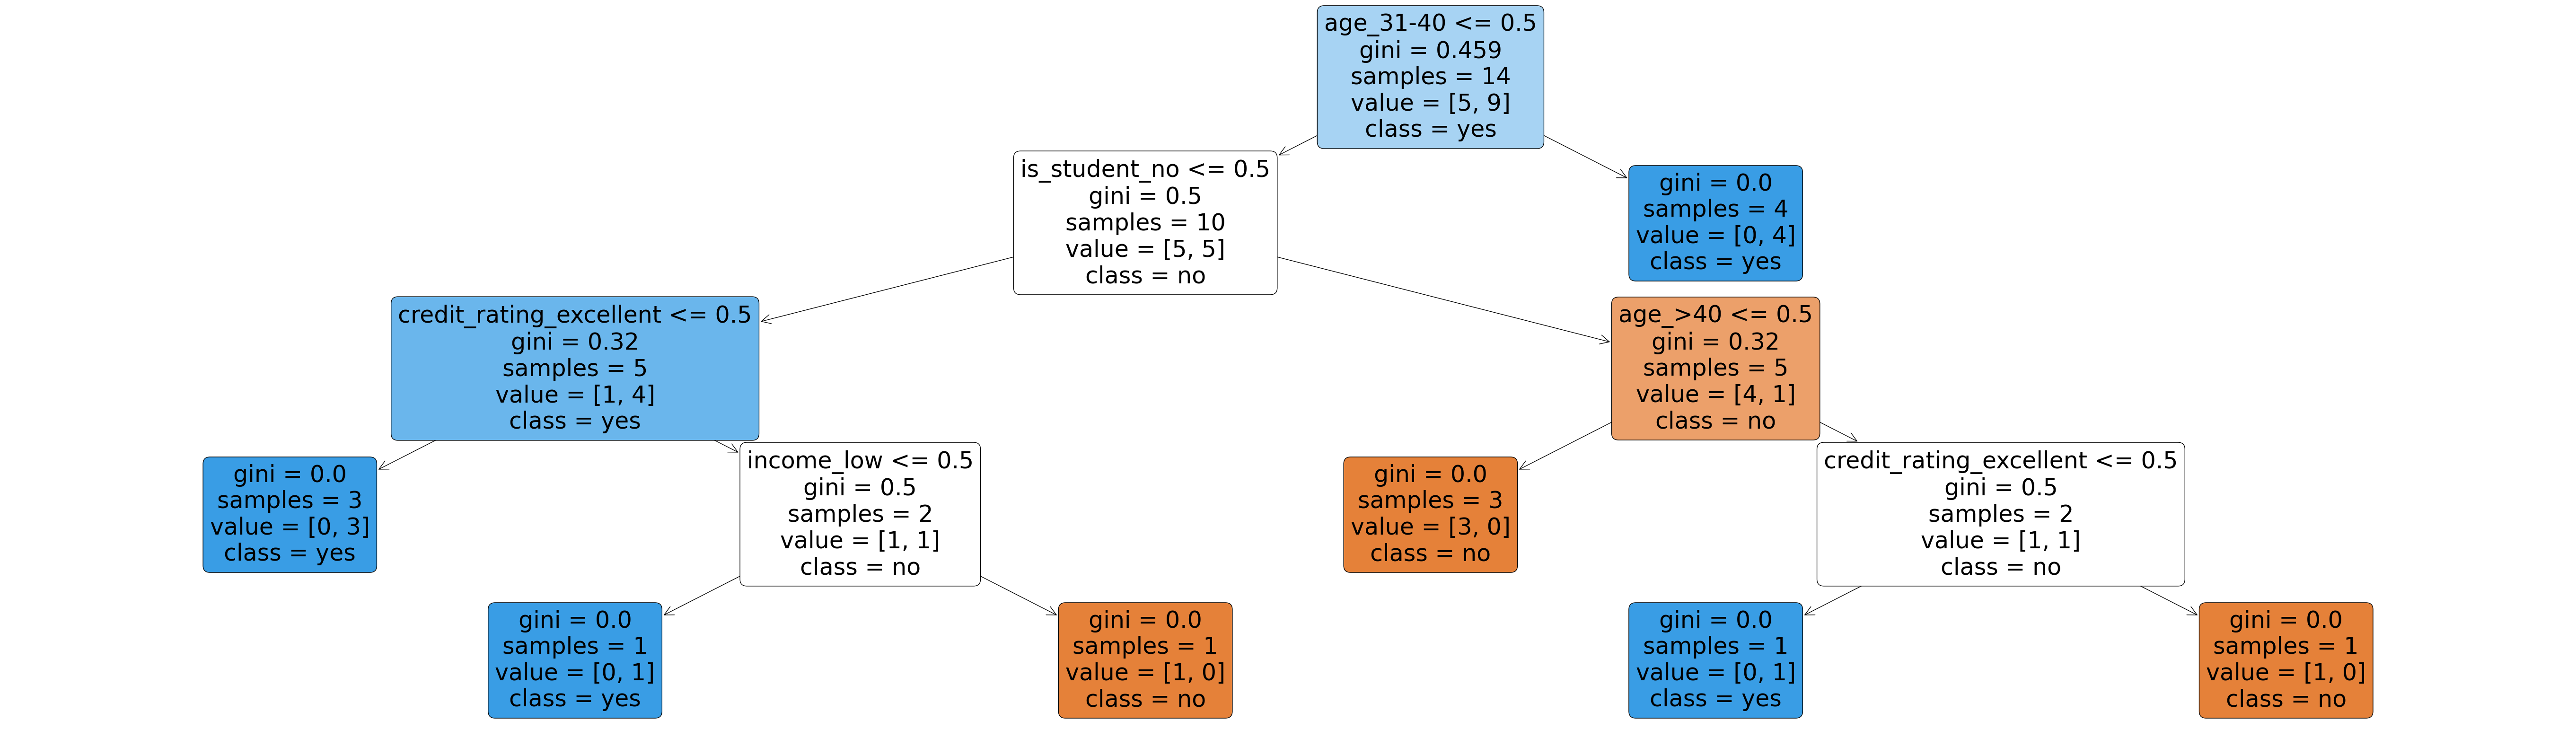

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the constructed tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

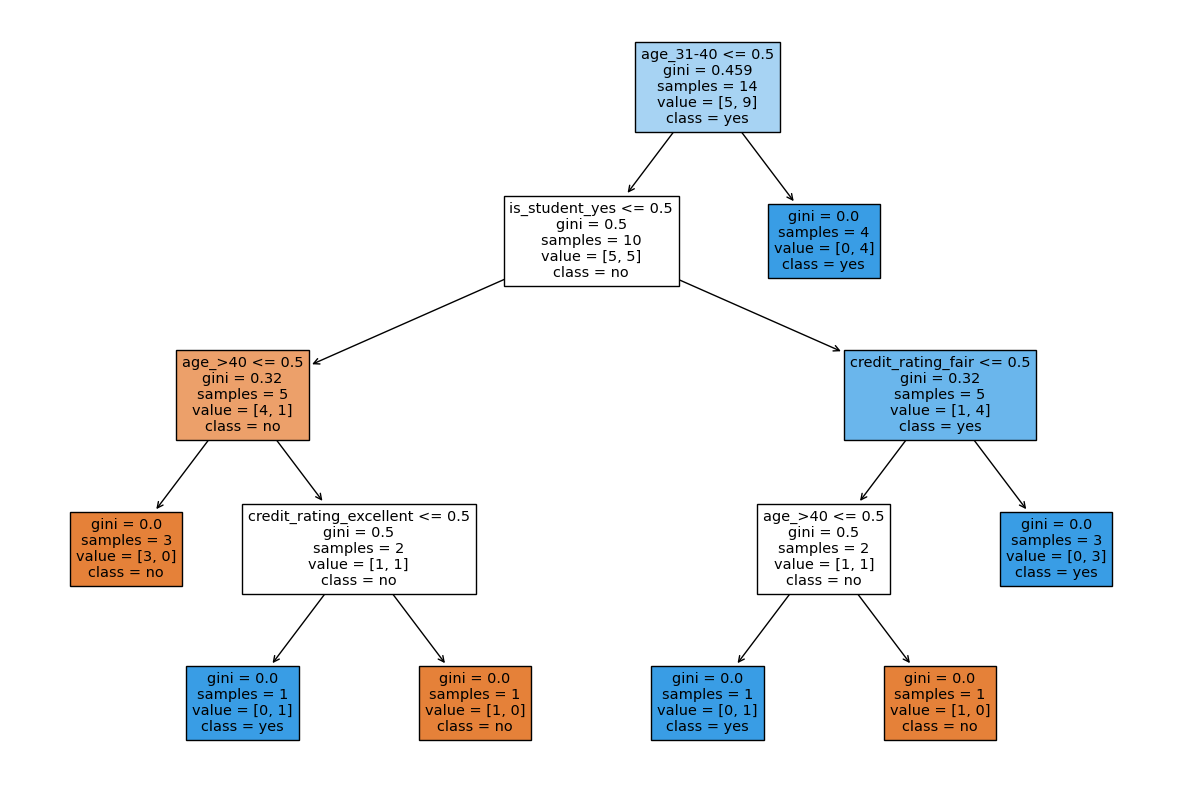

Training Set Accuracy (with Max Depth Constraint): 1.0
Test Set Accuracy (with Max Depth Constraint): 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier with max_depth constraint
model_with_max_depth = DecisionTreeClassifier(max_depth=5)

# Fit the model to your training data
model_with_max_depth.fit(X, y)

# Calculate training set accuracy with max_depth constraint
train_accuracy_with_max_depth = model_with_max_depth.score(X, y)

# Calculate test set accuracy with max_depth constraint
test_accuracy_with_max_depth = model_with_max_depth.score(X, y)

# Visualize the constructed tree with max_depth constraint
plt.figure(figsize=(15, 10))
plot_tree(model_with_max_depth, filled=True, feature_names=X.columns, class_names=model_with_max_depth.classes_)
plt.show()

print("Training Set Accuracy (with Max Depth Constraint):", train_accuracy_with_max_depth)
print("Test Set Accuracy (with Max Depth Constraint):", test_accuracy_with_max_depth)


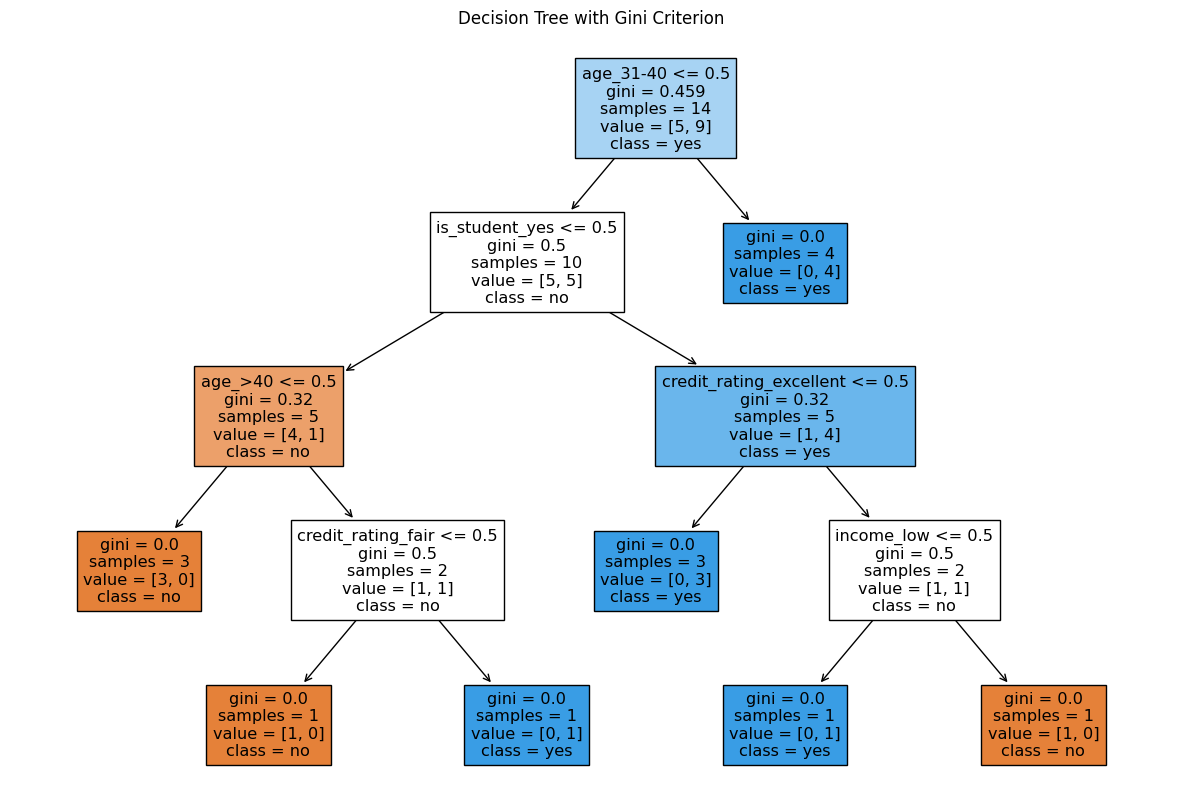

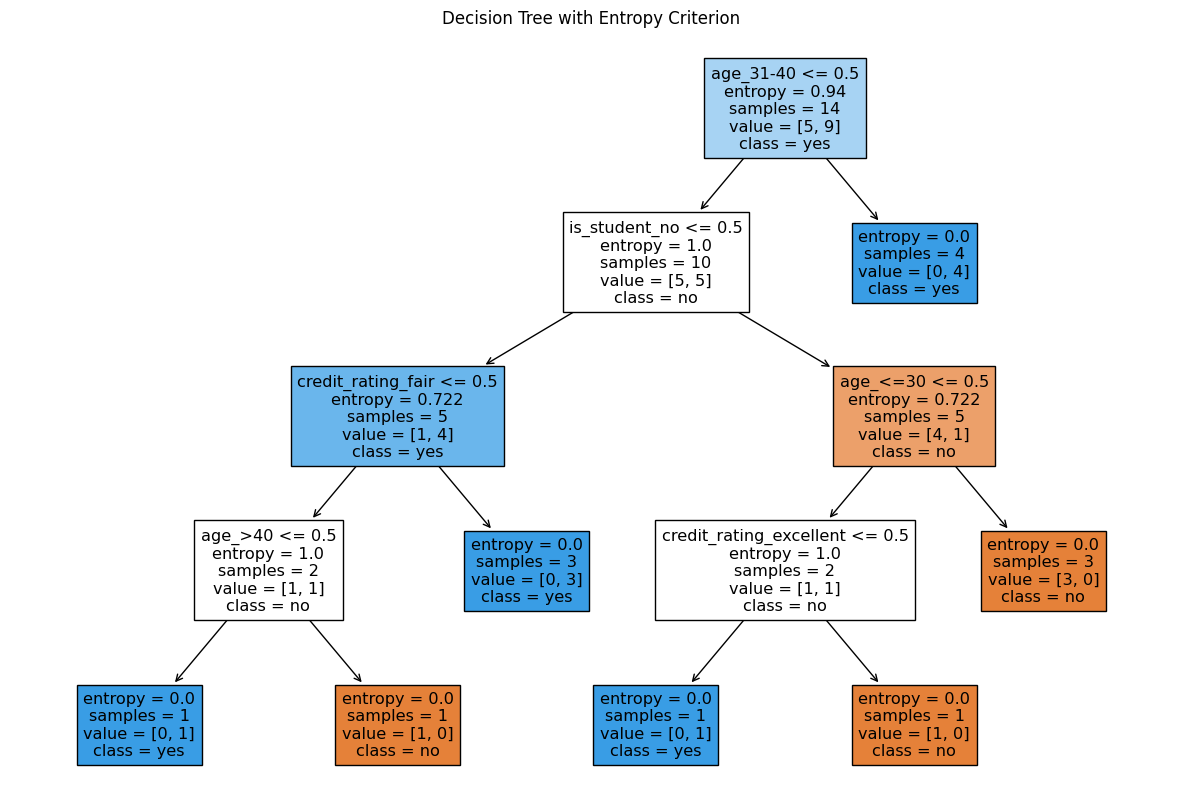

Training Set Accuracy (Gini Criterion): 1.0
Test Set Accuracy (Gini Criterion): 1.0
Training Set Accuracy (Entropy Criterion): 1.0
Test Set Accuracy (Entropy Criterion): 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier with the default "Gini" criterion
model_gini = DecisionTreeClassifier(criterion="gini")

# Fit the model with the default criterion to your training data
model_gini.fit(X, y)

# Calculate training set accuracy with the default "Gini" criterion
train_accuracy_gini = model_gini.score(X, y)

# Calculate test set accuracy with the default "Gini" criterion
test_accuracy_gini = model_gini.score(X, y)

# Create a DecisionTreeClassifier with "Entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")

# Fit the model with the "Entropy" criterion to your training data
model_entropy.fit(X, y)

# Calculate training set accuracy with "Entropy" criterion
train_accuracy_entropy = model_entropy.score(X, y)

# Calculate test set accuracy with "Entropy" criterion
test_accuracy_entropy = model_entropy.score(X, y)

# Visualize the constructed tree with the default "Gini" criterion
plt.figure(figsize=(15, 10))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=model_gini.classes_)
plt.title("Decision Tree with Gini Criterion")
plt.show()

# Visualize the constructed tree with the "Entropy" criterion
plt.figure(figsize=(15, 10))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=model_entropy.classes_)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

print("Training Set Accuracy (Gini Criterion):", train_accuracy_gini)
print("Test Set Accuracy (Gini Criterion):", test_accuracy_gini)
print("Training Set Accuracy (Entropy Criterion):", train_accuracy_entropy)
print("Test Set Accuracy (Entropy Criterion):", test_accuracy_entropy)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust the number of estimators as needed

# Fit the model to your training data
rf_model.fit(X, y)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a RandomForestClassifier with specified parameters
rf_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees in the forest
    criterion="gini",     # Split criterion ("gini" or "entropy")
    max_depth=None,       # Maximum depth of each tree
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,   # Minimum samples required in a leaf node
    max_features="auto",  # Number of features to consider at each split
    bootstrap=True,       # Whether to use bootstrapping
    random_state=42       # Random seed for reproducibility
)

# Fit the model to your training data
rf_model.fit(X, y)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X)

# Calculate accuracy
accuracy_rf = accuracy_score(y, y_pred_rf)

# Generate a classification report
report_rf = classification_report(y, y_pred_rf)

# Generate a confusion matrix
cm_rf = confusion_matrix(y, y_pred_rf)

# Access feature importances
feature_importances = rf_model.feature_importances_

# Access the number of features
n_features = rf_model.n_features_

# Access the number of target classes
n_classes = rf_model.n_classes_

# Access the out-of-bag (OOB) score (if bootstrap=True)
oob_score = rf_model.oob_score_

print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", report_rf)
print("\nConfusion Matrix:\n", cm_rf)
print("\nFeature Importances:", feature_importances)
print("\nNumber of Features:", n_features)
print("\nNumber of Target Classes:", n_classes)
print("\nOut-of-Bag (OOB) Score (if bootstrap=True):", oob_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


AttributeError: ignored